In [21]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

In [22]:
#read the training file
df = pd.read_csv('train.csv')

In [23]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
df.isna().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [24]:
df.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [25]:
df.shape

(42000, 785)

In [26]:
y = df['label']

In [27]:
df.drop(columns={'label'}, inplace=True)

In [28]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
#Do a train_test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.3, random_state = 42)

Epoch 1/500
115/115 [==============================] - 1s 11ms/step - loss: 8.0361 - accuracy: 0.8513 - val_loss: 0.8359 - val_accuracy: 0.9230
Epoch 2/500
115/115 [==============================] - 1s 10ms/step - loss: 0.4520 - accuracy: 0.9471 - val_loss: 0.5955 - val_accuracy: 0.9375
Epoch 3/500
115/115 [==============================] - 1s 10ms/step - loss: 0.2025 - accuracy: 0.9680 - val_loss: 0.4473 - val_accuracy: 0.9440
Epoch 4/500
115/115 [==============================] - 1s 10ms/step - loss: 0.1154 - accuracy: 0.9776 - val_loss: 0.4586 - val_accuracy: 0.9516
Epoch 5/500
115/115 [==============================] - 1s 10ms/step - loss: 0.0700 - accuracy: 0.9840 - val_loss: 0.4639 - val_accuracy: 0.9516
Epoch 6/500
115/115 [==============================] - 1s 10ms/step - loss: 0.0486 - accuracy: 0.9890 - val_loss: 0.4402 - val_accuracy: 0.9540
Epoch 7/500
115/115 [==============================] - 1s 10ms/step - loss: 0.0378 - accuracy: 0.9908 - val_loss: 0.4682 - val_accuracy:

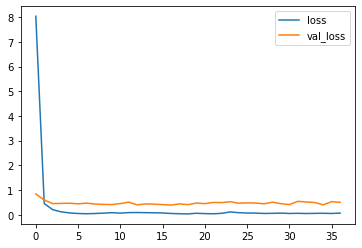

In [51]:
#Run a neural network on training data and predict accuracy on test data
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

np.random.seed(42)

n_cols = df.shape[1]
model= Sequential()
model.add(Dense(700, activation='relu', input_shape=(n_cols,)))
model.add(Dense(400, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#y = pd.DataFrame(y)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks= [early_stopping], batch_size=256, epochs=500)
#model.fit(X_Tf_df, y)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Maximum validation accuracy: {}".format(history_df['val_accuracy'].max()))

### NN model gives 97.3% accuracy

In [73]:
#Convert the flattened train data to 28X28 pxel image
path = 'train.csv'
def get_data(path):
    with open(path) as data_file:
        # Your code starts here
        headers = data_file.readline()
        a = np.loadtxt(data_file, delimiter=',')
        labels = a[:,0]
        a = a[:,1:]
        images = np.reshape(a, (-1, 28, 28))
        images = images.astype(float)
    return images, labels

In [74]:
training_images, training_labels = get_data(path)
print("training_images.shape: ", training_images.shape)
print("training_labels.shape: ", training_labels.shape)

training_images.shape:  (42000, 28, 28)
training_labels.shape:  (42000,)


Epoch 1/100
132/132 [==============================] - 25s 189ms/step - loss: 0.2838 - accuracy: 0.9172 - val_loss: 0.0876 - val_accuracy: 0.9729
Epoch 2/100
132/132 [==============================] - 24s 184ms/step - loss: 0.0531 - accuracy: 0.9839 - val_loss: 0.0780 - val_accuracy: 0.9755
Epoch 3/100
132/132 [==============================] - 24s 185ms/step - loss: 0.0277 - accuracy: 0.9912 - val_loss: 0.0652 - val_accuracy: 0.9801
Epoch 4/100
132/132 [==============================] - 25s 188ms/step - loss: 0.0121 - accuracy: 0.9968 - val_loss: 0.0722 - val_accuracy: 0.9788
Epoch 5/100
132/132 [==============================] - 25s 193ms/step - loss: 0.0070 - accuracy: 0.9982 - val_loss: 0.0633 - val_accuracy: 0.9825
Epoch 6/100
132/132 [==============================] - 28s 211ms/step - loss: 0.0057 - accuracy: 0.9985 - val_loss: 0.0717 - val_accuracy: 0.9807
Epoch 7/100
132/132 [==============================] - 32s 241ms/step - loss: 0.0028 - accuracy: 0.9996 - val_loss: 0.0739 -

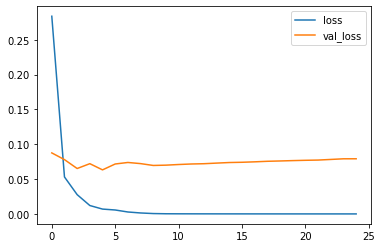

In [87]:
#Run a 2 layer convolution neural network with dropouts and batch normalization
import tensorflow as tf
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dense, Conv2D, Flatten
from keras.models import Sequential

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

np.random.seed(42)
training_images = training_images.reshape(-1, 28, 28, 1)

model = Sequential()
keras.layers.Dropout(0.95)
model.add(Conv2D(30, kernel_size=3, activation='relu',))
model.add(BatchNormalization())
keras.layers.Dropout(0.5)
model.add(Conv2D(30, kernel_size=3, activation='relu',))
model.add(Flatten())
keras.layers.Dropout(0.95)
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#y = pd.DataFrame(y)
history= model.fit(training_images, training_labels, validation_split= 0.2, callbacks= [early_stopping], batch_size= 256, epochs=100)


history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Maximum validation accuracy: {}".format(history_df['val_accuracy'].max()))

### A CNN model gives 98.5% accuracy